In [3]:
import pandas as pd
import numpy as np

Poisson regression-

$$ log L = \sum_{i} y_{i} X_{i}\beta - e^{X_{i}\beta} - log y_{i}! $$

$$ \nabla log L = \sum_{i} (y_{i}  - e^{X_{i}\beta}) X_{i}^{T}$$

$$ \nabla^{2} log L = - \sum_{i}  e^{X_{i}\beta}  X_{i}X_{i}^{T}$$

Newton-Raphson update steps for $\beta$-

$$ \beta^{t+1}  = \beta^{t} - (\nabla^{2} log L)^{-1}(\nabla log L)$$


In [4]:
from numpy.random import normal
np.random.seed(37)


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.exp(z)

In [5]:
import _approx

beta = _approx.newton_opt(X,y,10000)
print(beta)

[-1.99996534 -0.14999278 -0.49976397 -0.20017282]


In [41]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor()
clf.fit(X, y)
clf.coef_


array([0.13554465, 0.44964595, 0.17958408])

$$\nabla w = \frac{1}{m} \sum^{m}_{i=1} x^{(i)}(\hat{y}^{(i)} - y^{(i)}) \Rightarrow \frac{1}{m} X(\hat{Y} - Y)$$

$$\nabla b = \frac{1}{m} \sum^{m}_{i=1} \hat{y}^{(i)} - y^{(i)} \Rightarrow \frac{1}{m} (\hat{Y} - Y)$$

$$loss = \frac{1}{m} \sum^{m}_{i = 1}\hat{y}^{(i)} - log(\hat{y}^{(i)})y^{(i)}$$

In [6]:
w, b = _approx.gradient_descent(X, y, 1000)
print(b,w)


1.9967150776180067 [0.15060772 0.50186413 0.20109732]


In [14]:
import importlib

importlib.reload(_approx)

<module '_approx' from '/home/BCCRC.CA/ssubedi/projects/experiments/fastsca/fastsca/_approx.py'>

In [15]:


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)

w = _approx.coordinate_descent(X,z,1000)
print(w)

from sklearn.linear_model import LinearRegression
 
regr = LinearRegression()
regr.fit(X,z)
 
print(regr.coef_)

[199.99794656  14.91099419  49.90809526  20.01858883]
[0.14994115 0.50005107 0.20001164]


In [4]:
import numpy as np
from numpy.random import normal
import pandas as pd

M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)

In [5]:
df = pd.DataFrame(X)
dfy = pd.DataFrame(z)


In [8]:
import scipy.io, scipy.sparse

scipy.io.mmwrite("test_x.mtx", scipy.sparse.csr_matrix(df))
scipy.io.mmwrite("test_y.mtx", scipy.sparse.csr_matrix(dfy))

In [10]:
from sklearn.linear_model import LinearRegression
 
regr = LinearRegression()
regr.fit(X,z)
 
print(regr.coef_)
print(regr.intercept_)

[0.15005483 0.50004064 0.19986727]
2.0000617190805206


In [4]:
import numpy as np
import pandas as pd
from numpy.random import normal
np.random.seed(37)
dfht = pd.DataFrame([
[0.8,0.15,0.05],
[0.75,0.15,0.1],
[0.15,0.05,0.8],
[0.05,0.8,0.15],
])

a = list(normal(5,1,10)) + list(normal(1,1,10)) + list(normal(1,1,10))
b = list(normal(1,1,10)) + list(normal(1,1,10)) + list(normal(5,1,10))
c = list(normal(1,1,10)) + list(normal(5,1,10)) + list(normal(1,1,10))
dfwt = pd.DataFrame([a,b,c])


dfy = pd.DataFrame(np.dot(dfwt.T.to_numpy(),dfht.T.to_numpy()))

In [7]:
from sklearn.decomposition import NMF
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform(np.exp(dfy.to_numpy()))
H = model.components_

<AxesSubplot:>

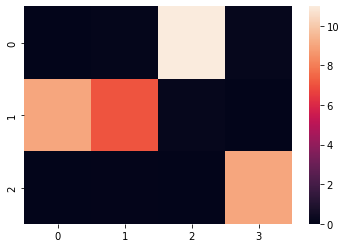

In [10]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(H)

<AxesSubplot:>

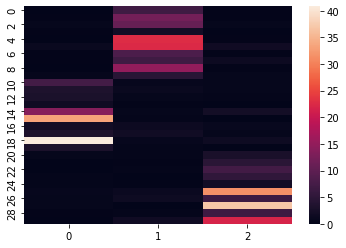

In [9]:
sns.heatmap(W)

TODO-  recheck code and test

### Alternative local Poisson approximation

Let $Y_{gb}$ be pseudobulk matrix.

$$\mathbb{E}\!\left[Y_{gb}\right] = \exp\left( \sum_{k} W_{gk} H_{bk} \right)$$

Let $\eta_{gb} = \sum_{k} W_{gk} H_{bk}$

$$\sum_{g,b} Y_{gb} \ln \eta_{gb} - \eta_{gb}$$


We can construct quadratic approximation from previous $\tilde{\eta}$

$\tilde{Y}_{gb} = Y_{gb} -1 + \tilde{\eta}_{gb} + \exp(-\tilde{\eta}_{gb})$

$\tilde{w}_{gb} = \exp(\tilde{\eta}_{gb})$

Solving for $H$ given $W$:
$$\sum_{g}\tilde{w}_{gb} \left( \tilde{Y}_{gb} - \sum_{k} W_{gk} H_{bk} \right)^{2}$$


$$H_{bk} \gets 
\frac{\sum_{g} \tilde{w}_{gb} (\tilde{Y} - \sum_{s \neq k} W_{gs} H_{bs}) W_{gk}}
     {\sum_{g} \tilde{w}_{gb} W_{gk}^{2}}$$

Solving for $W$ given $H$:

$$\sum_{b}\tilde{w}_{gb} \left( \tilde{Y}_{gb} - \sum_{k} H_{bk} W_{gk} \right)^{2}$$


$$W_{gk} \gets 
\frac{\sum_{b} \tilde{w}_{gb} (\tilde{Y}_{gb} - \sum_{s \neq k} H_{bs} W_{gs} )H_{bk} }
     {\sum_{b} \tilde{w}_{gb} H_{bk}^{2}}$$




In [ ]:
from numpy.random import normal 

y= np.matrix(df.to_numpy())
k = 10
g = y.shape[1]
b = y.shape[0]
W = np.matrix(normal(0.0, 1.0, g * k).reshape(g, k))
H = np.matrix(normal(0.0, 1.0, k * b).reshape(k, b))

w = np.exp(np.dot(W,H))
#update 
for iter in range(100):
    yhat = np.dot(W,H)
    
    for ki in range(k):

        yhat_k = np.dot(W[:,ki],H[ki,:])
        yhat_ex_k = yhat - yhat_k
        res = y.T - yhat_ex_k    
        res_gb = np.multiply(res,w)
        res_kb = np.dot(W[:,ki].T,res_gb)
        res_allk = np.dot(np.square(W[:,ki]).T,w)
        H[ki,:] =  res_kb / res_allk

    for ki in range(k):


        yhat_k = np.dot(W[:,ki],H[ki,:])
        yhat_ex_k = yhat - yhat_k
        res = y.T - yhat_ex_k
        res_gb = np.multiply(res,w)
        res_kg = np.dot(H[ki,:],res_gb.T)
        res_allk = np.dot(np.square(H[ki,:]),w.T)
        W[:,ki] =  (res_kg / res_allk).T
